In [151]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.options.mode.chained_assignment = None

# Online Shoppers Intention

Этот набор данных содержит сессии, связанные с поведением пользователей на веб-страницах онлайн-магазина. Каждая сессия принадлежит уникальному пользователю в течение одного года, чтобы избежать склонности к определенному событию, праздничному дню, профилю пользователя или периоду.

Для каждой сессии указано:

 - `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, `Product Related Duration` представляют количество различных типов веб-страниц, посещенных пользователем в рамках одной сессии, и общее время, потраченное на каждую страницу. Значения этих функций извлекаются из URL-адреса посещаемых страниц и обновляются в реальном времени, когда пользователь перемещается по страницам.
 - `Bounce Rate`, `Exit Rate` , `Page Value` представляют собой показатели, измеряемые "Google Analytics" для каждой страницы e-commerce сайта. Значение `Bounce Rate` для веб-страницы представляет собой процент пользователей, которые заходят на сайт с текущей страницы, а затем уходят, не совершая никаких других запросов к серверу аналитики во время этой сессии. Значение `Exit Rate` для конкретной веб-страницы рассчитывается как процент всех просмотров страницы, которые были последними в сессии. `Page Value` представляет собой среднее значение для веб-страницы, которую посетил пользователь перед завершением транзакции.
 - `Special Day` указывает на то, что время посещения сайта близко к празднику (например, Дню матери, Дню святого Валентина), в который сессии с большей вероятностью будут завершены транзакцией. Значение этого атрибута определяется с учетом динамики электронной торговли. (продолжительность между датой заказа и датой доставки)
 - `Operating system` - операционная система пользователя
 - `Browser` - браузер пользователя
 - `Region` - регион / местоположение пользователя
 - `Traffic type` - тип трафика
 - `Visitor type` - вернувшийся пользователь / новый пользователь
 - `Weekend` - выходной день / не выходной день
 - `Month` - месяц
 - `Revenue` - совершит ли пользователь покупку

Задача: построить модель, которая на основе текущих данных предсказывает, совершит ли пользователь интернет-магазина покупку.

## Чтение данных

In [152]:
url = "https://raw.githubusercontent.com/Alexpetr0v/ML-online-shoppers-intention/master/online_shoppers_intention.csv"
df = pd.read_csv(url)

In [153]:
df.shape

(12330, 18)

In [154]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [155]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [156]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [158]:
df.index

RangeIndex(start=0, stop=12330, step=1)

## Обработка пропущенных значений

In [159]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [160]:
df = df.dropna(axis=0)

In [161]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Определим типы признаков. `Operating systems`, `Browser`, `Region`, `Traffic type` классифицируются как числовые признаки, однако они представляют собой числа, которые являются категориями.

In [162]:
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region',
            'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [163]:
df.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

In [164]:
for col in cat_cols:
    print(col)
    print(df[col].unique())
    print('-----------------------')

Month
['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Feb', 'Mar', 'May', 'Oct', ..., 'Aug', 'Nov', 'Sep', 'Dec']
-----------------------
OperatingSystems
[1, 2, 4, 3, 7, 6, 8, 5]
Categories (8, int64): [1, 2, 4, 3, 7, 6, 8, 5]
-----------------------
Browser
[1, 2, 3, 4, 5, ..., 8, 9, 12, 13, 11]
Length: 13
Categories (13, int64): [1, 2, 3, 4, ..., 9, 12, 13, 11]
-----------------------
Region
[1, 9, 2, 3, 4, 5, 6, 7, 8]
Categories (9, int64): [1, 9, 2, 3, ..., 5, 6, 7, 8]
-----------------------
TrafficType
[1, 2, 3, 4, 5, ..., 18, 19, 16, 17, 20]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 19, 16, 17, 20]
-----------------------
VisitorType
['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['Returning_Visitor', 'New_Visitor', 'Other']
-----------------------
Weekend
[False, True]
Categories (2, object): [False, True]
-----------------------
Revenue
[False, True]
Categories (2, object): [False, True]
----

В `Month` отсутствуют два месяца `Jan` и `Apr`. В `VisitorType` есть значение `Other`, давайте посмотрим, сколько образцов имеет значение `Other` в качестве возвращаемого значения пользователя.

In [165]:
sum(df['VisitorType'] == 'Other')

85

В 85 сессиях тип пользователя указан как `Other` - я полагаю, `Other` может иметь какое-то действительно важное значение, поэтому оставим его.

Существуют также отрицательные значения продолжительности, возможно ошибка.

In [166]:
len(df.loc[df['ProductRelated_Duration'] == -1, 'ProductRelated_Duration'])

33

In [167]:
len(df.loc[df['Informational_Duration'] == -1, 'Informational_Duration'])

33

In [168]:
len(df.loc[df['Administrative_Duration'] == -1, 'Administrative_Duration'])

33

Таких записей всего 33, поэтому мы можем удалить их.

In [169]:
df = df.loc[df['Administrative_Duration'] != -1, ]

In [170]:
sum(df[['Administrative_Duration',
          'Informational_Duration',
          'ProductRelated_Duration']].sum(axis = 1) == 0)

685

685 пользователей провели на страницах нулевое количество времени.

## Выбросы

In [171]:
data = df.copy()

In [172]:
rows_to_drop1 = data[(data['Administrative_Duration'] < data['Administrative_Duration'].quantile(0.005)) |
                    (data['Administrative_Duration'] > data['Administrative_Duration'].quantile(0.995))].index
data = data.drop(rows_to_drop1)
data.index = range(len(data.index))

In [173]:
rows_to_drop2 = data[(data['Informational_Duration'] < data['Informational_Duration'].quantile(0.005)) |
                    (data['Informational_Duration'] > data['Informational_Duration'].quantile(0.995))].index
data = data.drop(rows_to_drop2)
data.index = range(len(data.index))

In [174]:
rows_to_drop3 = data[(data['BounceRates'] < data['BounceRates'].quantile(0.005)) |
                    (data['BounceRates'] > data['BounceRates'].quantile(0.995))].index
data = data.drop(rows_to_drop3)
data.index = range(len(data.index))

In [175]:
rows_to_drop4 = data[(data['ExitRates'] < data['ExitRates'].quantile(0.005)) |
                    (data['ExitRates'] > data['ExitRates'].quantile(0.995))].index
data = data.drop(rows_to_drop4)
data.index = range(len(data.index))

In [176]:
rows_to_drop5 = data[(data['ProductRelated_Duration'] < data['ProductRelated_Duration'].quantile(0.005)) |
                    (data['ProductRelated_Duration'] > data['ProductRelated_Duration'].quantile(0.995))].index
data = data.drop(rows_to_drop5)
data.index = range(len(data.index))

In [177]:
rows_to_drop6 = data[(data['PageValues'] < data['PageValues'].quantile(0.005)) |
                    (data['PageValues'] > data['PageValues'].quantile(0.995))].index
data = data.drop(rows_to_drop6)
data.index = range(len(data.index))

In [178]:
data.shape

(12037, 18)

## Визуализация и статистика

In [179]:
sns.set(style='white', rc={'figure.figsize':(10, 6)})

##### Характеристики для всех числовых признаков

In [180]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000
mean,2.250395,71.921202,0.462574,26.119294,29.773033,1096.800350,0.022053,0.043077,5.092568,0.062408
std,3.233354,134.485317,1.159454,93.712542,36.982919,1438.286422,0.048101,0.048286,14.139027,0.200465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.625000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,6.000000,0.000000,0.000000,18.000000,587.916667,0.003077,0.025424,0.000000,0.000000
75%,4.000000,90.000000,0.000000,0.000000,37.000000,1423.000000,0.017073,0.050000,0.000000,0.000000
max,24.000000,1172.000000,14.000000,944.750000,440.000000,10340.369160,0.200000,0.200000,109.912405,1.000000


##### Характеристики для всех категориальных признаков

In [181]:
data.describe(include=['category'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12037,12037,12037,12037,12037,12037,12037,12037
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3314,6409,7759,4658,3785,10297,9241,10232


#### Распределение пользователей

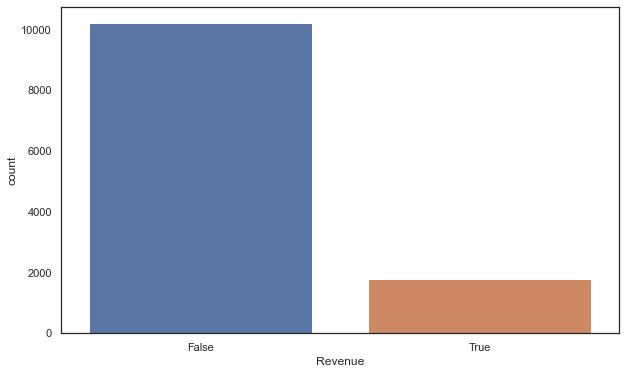

In [182]:
sns.countplot(x='Revenue', data=data)
pass

In [183]:
print(round(sum(data['Revenue'])/len(data['Revenue']), 2)*100, "% пользователей приносят доход")

15.0 % пользователей приносят доход


#### Распределение пользователей по регионам

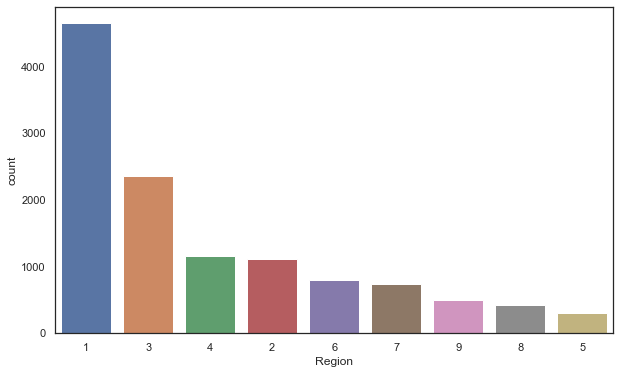

In [184]:
sns.countplot(x='Region', order=data['Region'].value_counts().index, data=data)
pass

In [185]:
data['Region'].value_counts()

1    4658
3    2352
4    1153
2    1107
6     795
7     745
9     494
8     429
5     304
Name: Region, dtype: int64

Больше всего пользователей из региона 1.

#### Распределение дохода по регионам

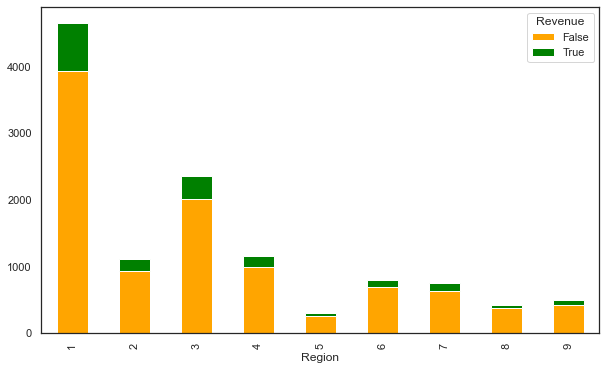

In [186]:
pd.crosstab(data['Region'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

Наибольший доход получаем от пользователей, которые вошли в систему из региона-1.

#### Распределение типа пользователей

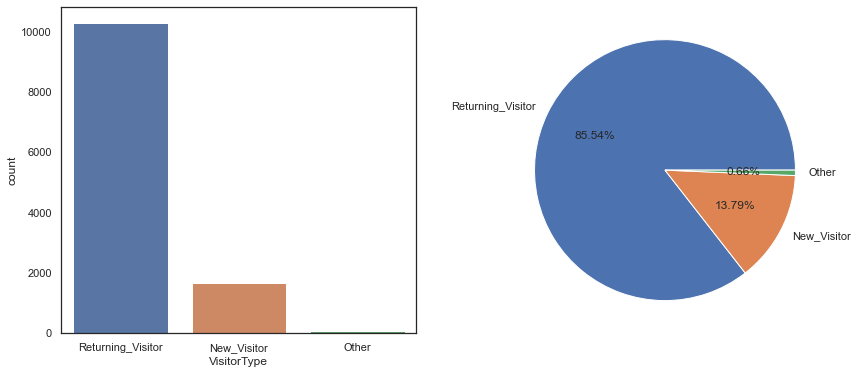

In [187]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))
sns.countplot(x='VisitorType', order=data['VisitorType'].value_counts().index, data=data, ax=ax[0])
plt.pie(data['VisitorType'].value_counts(), labels=['Returning_Visitor', 'New_Visitor', 'Other'], autopct='%.2f%%')
pass

#### Доход в зависимости от типа пользователя

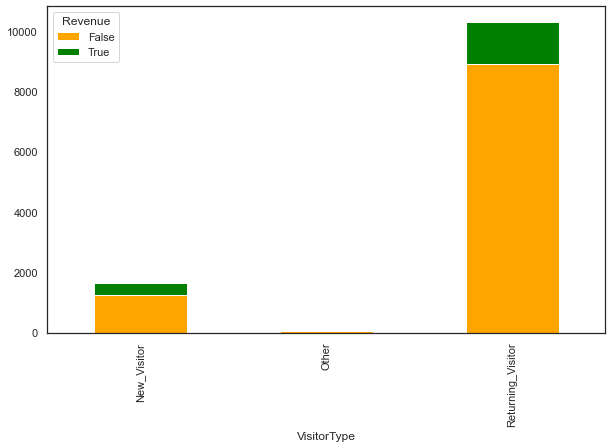

In [188]:
pd.crosstab(data['VisitorType'], data['Revenue']).plot(kind='bar',stacked=True, color=['orange', 'green'])
pass

#### Распределение пользователей по операционным системам

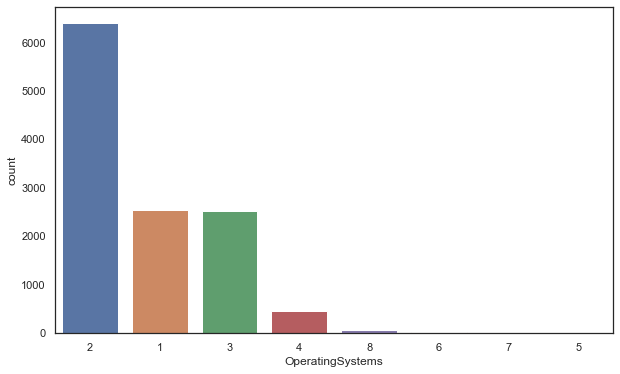

In [189]:
sns.countplot(x='OperatingSystems', order=data['OperatingSystems'].value_counts().index, data=data)
pass

In [190]:
data['OperatingSystems'].value_counts()

2    6409
1    2540
3    2515
4     467
8      74
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Больше половины пользователей используют операционную систему 2.

#### Распределение трафика

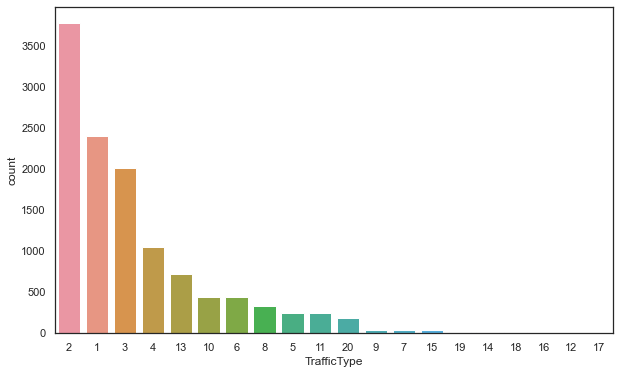

In [191]:
sns.countplot(x='TrafficType', order=data['TrafficType'].value_counts().index, data=data)
pass

#### Доход в зависимости от трафика

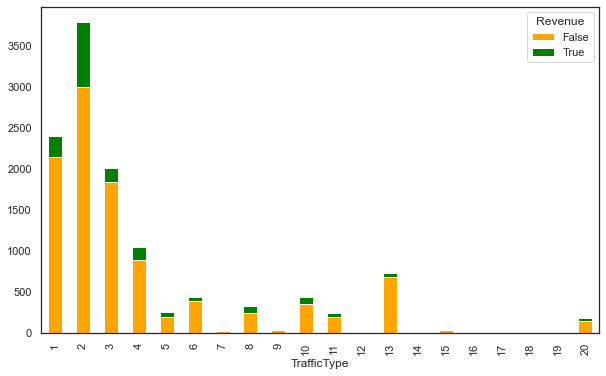

In [192]:
pd.crosstab(data['TrafficType'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

Наибольший доход получаем от пользователей, имеющий тип трафика - 2.

#### Выходной день или будний

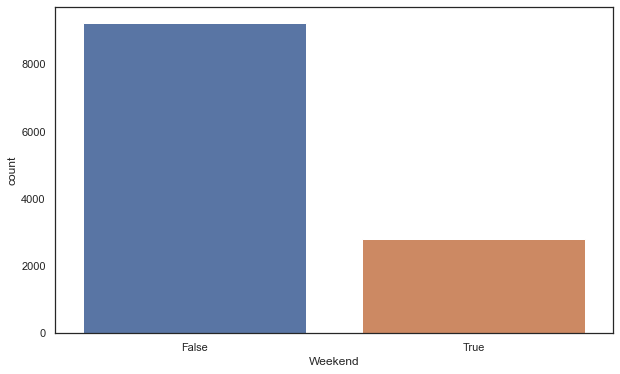

In [193]:
sns.countplot(x='Weekend', data=data)
pass

#### Доход в выходные дни

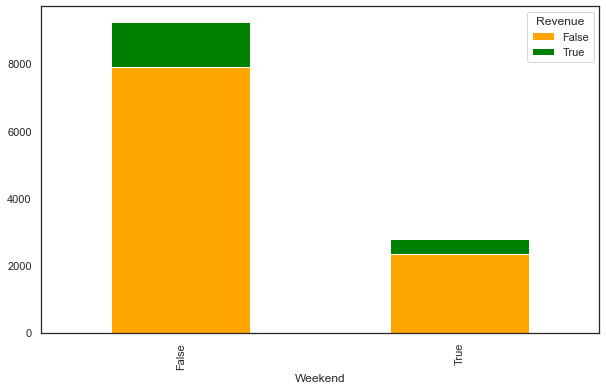

In [194]:
pd.crosstab(data['Weekend'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

Большая часть дохода была получена в будние дни.

#### Распределение дохода в праздничные дни

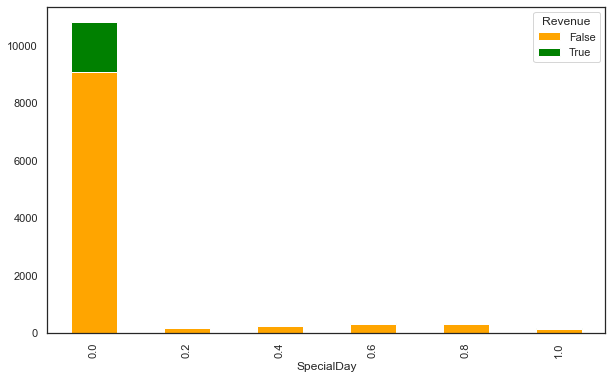

In [195]:
pd.crosstab(data['SpecialDay'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

#### Распределение пользователей по месяцам

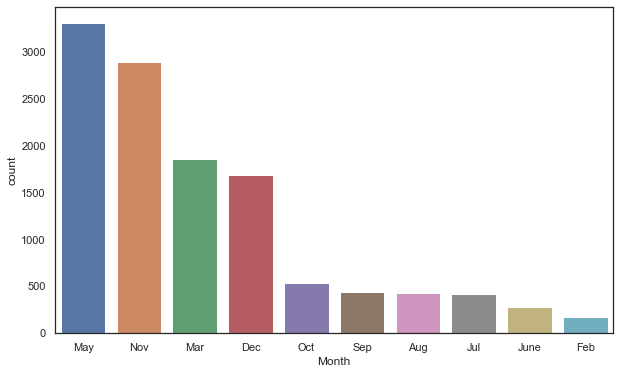

In [196]:
sns.countplot(x='Month', order=data['Month'].value_counts().index, data=data)
pass

#### Распределение дохода по месяцам

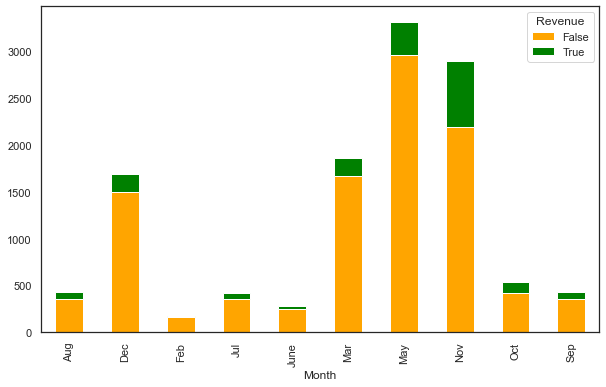

In [197]:
pd.crosstab(data['Month'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

В ноябре получается самый большой доход.

#### Диаграммы рассеивания

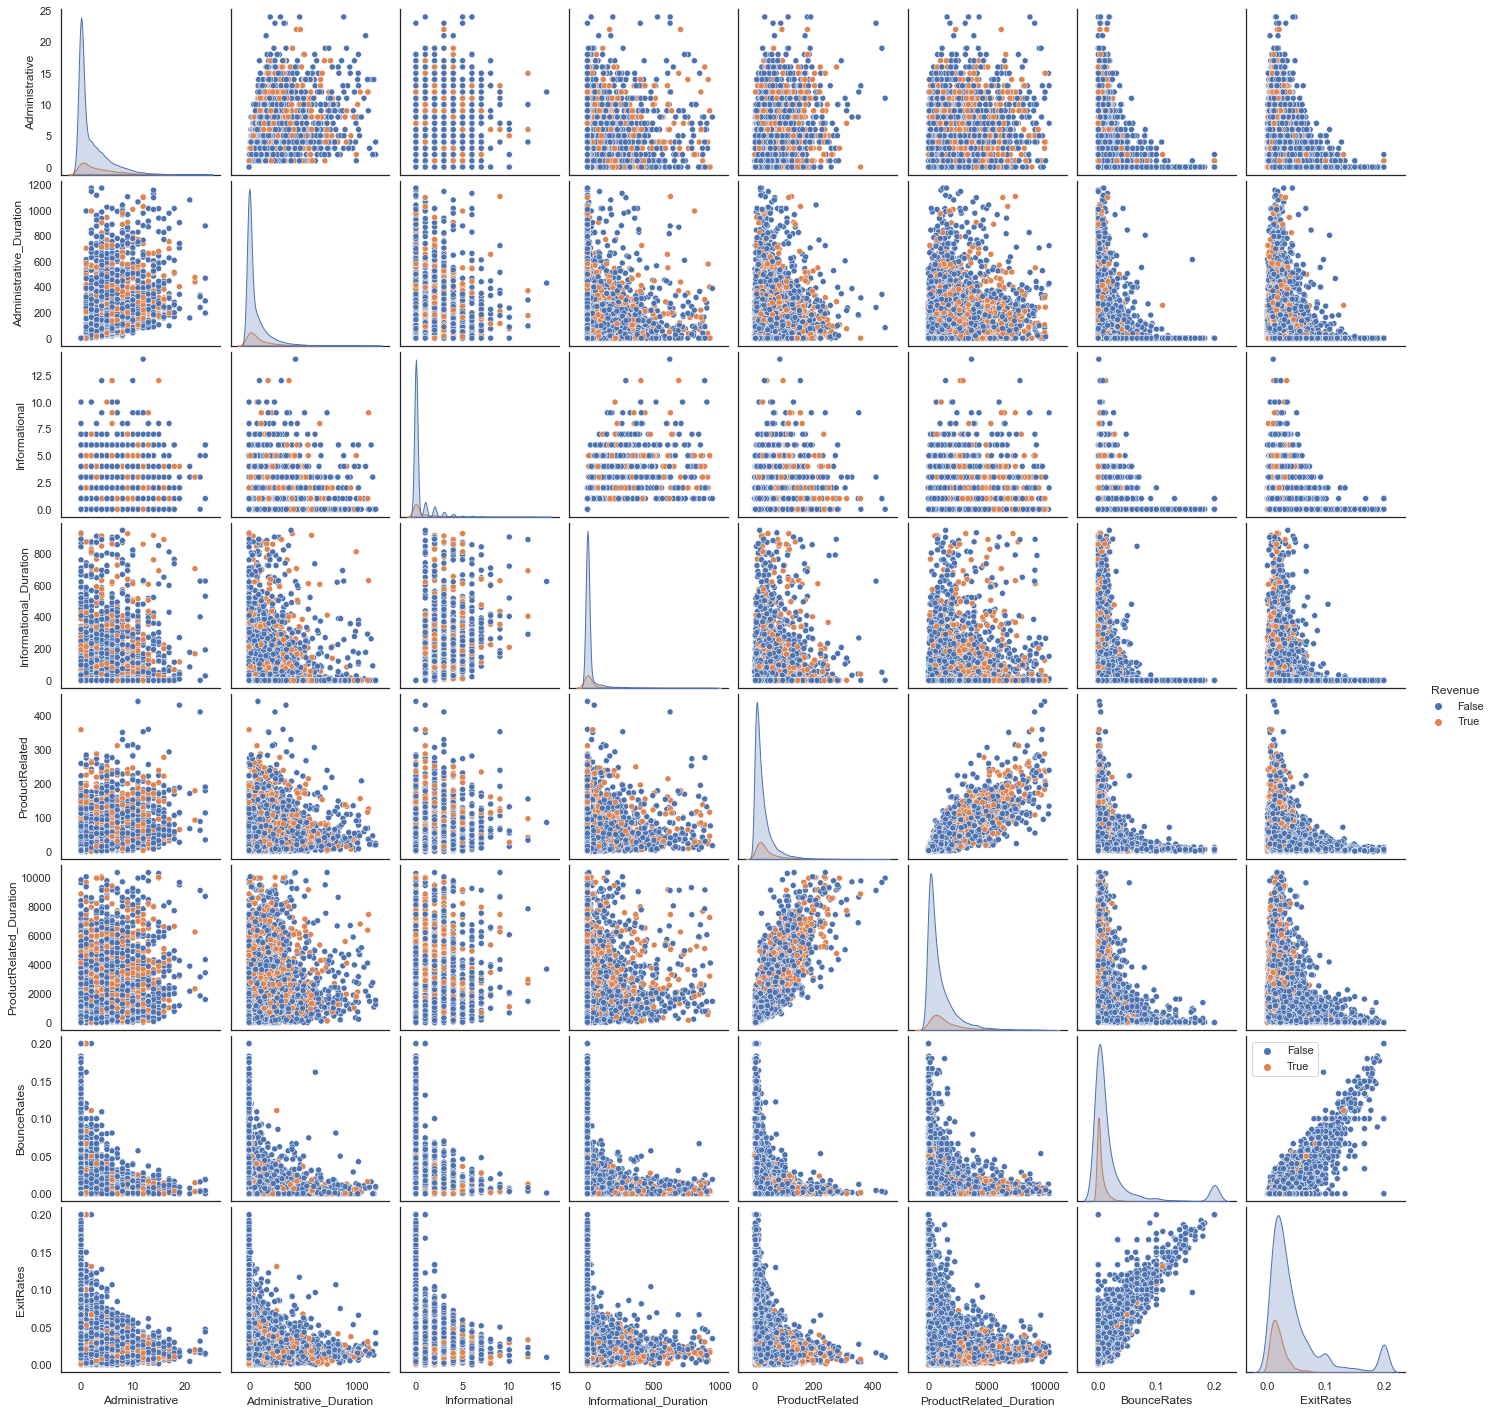

In [198]:
new_data = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Revenue']]
sns.pairplot(new_data, diag_kind='auto', hue='Revenue')
plt.legend()
pass

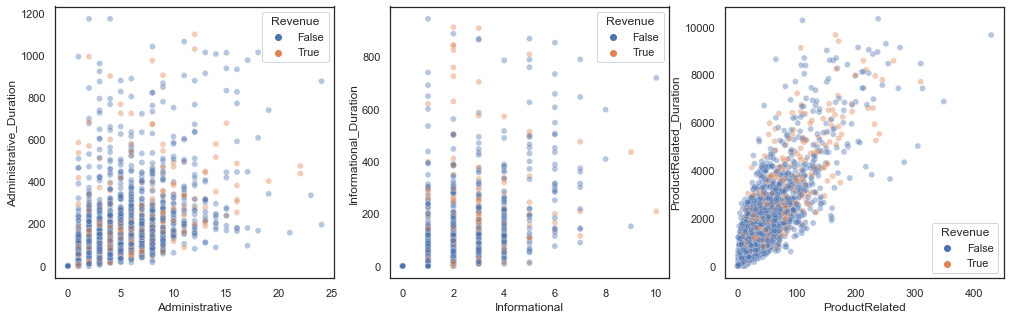

In [199]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=5000, replace=False)
sns.scatterplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=data.iloc[random_subset], alpha=0.4, ax=ax[0])
sns.scatterplot(x='Informational', y='Informational_Duration', hue='Revenue', data=data.iloc[random_subset], alpha=0.4, ax=ax[1])
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', hue='Revenue', data=data.iloc[random_subset], alpha=0.4, ax=ax[2])
pass

- Для начальных типов страниц обнаруживаются пользователи с большой продолжительностью работы:(0-15: административные; 0-10: информационные; 0-300: связанные с продуктом)
- Между `ProductRelated` и `ProductRelated_Duration` существует линейная зависимость (мультиколлинеарность)

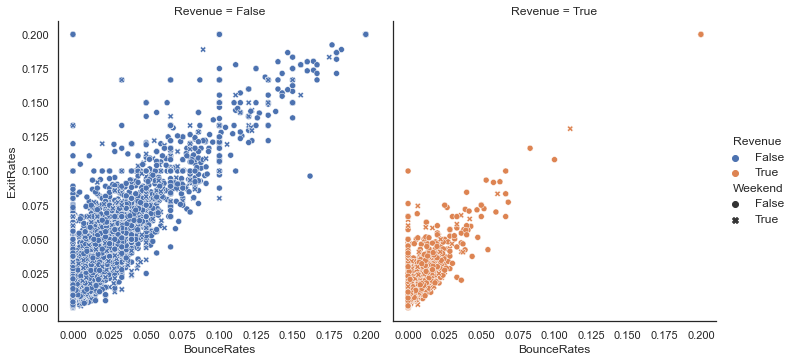

In [200]:
sns.relplot(x='BounceRates', y='ExitRates', col='Revenue', hue='Revenue', style='Weekend', data=data)
pass

- Высокие показатели отказов и выходов не приводят к получению дохода
- Данные о доходах сильно несбалансированы
- Больше отказов и выходов, когда будний день

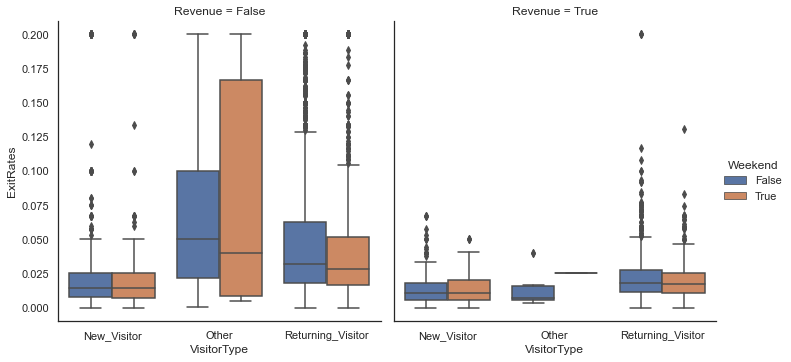

In [201]:
sns.catplot(x='VisitorType', y='ExitRates', hue='Weekend', col='Revenue', data=data, kind='box')
pass

- Когда есть доход, показатель выхода со страниц очень маленький, и количество выходов не сильно меняется, учитывая выходные и тип пользователей.
- Значительные колебания наблюдаются в показателях выхода со страниц из категории Other, когда выходные дни не приносят никакого дохода.
- Новые посетители имеют низкие показатели выхода со страницы, которые практически одинаковы в обоих случаях дохода. Довольно хорошо держать новых посетителей.

#### Матрица корреляции для числовых признаков

In [202]:
corr_mat = data.corr()
corr_mat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.680020,0.360329,0.276130,0.428050,0.379377,-0.222657,-0.317035,0.129673,-0.096021
Administrative_Duration,0.680020,1.000000,0.285556,0.218935,0.277598,0.294953,-0.167483,-0.243416,0.103956,-0.081983
Informational,0.360329,0.285556,1.000000,0.669451,0.332020,0.335933,-0.115872,-0.164606,0.072010,-0.050504
Informational_Duration,0.276130,0.218935,0.669451,1.000000,0.249272,0.267315,-0.085050,-0.125110,0.065227,-0.039172
ProductRelated,0.428050,0.277598,0.332020,0.249272,1.000000,0.848644,-0.226242,-0.324206,0.079363,-0.016022
ProductRelated_Duration,0.379377,0.294953,0.335933,0.267315,0.848644,1.000000,-0.220885,-0.302838,0.095944,-0.033061
BounceRates,-0.222657,-0.167483,-0.115872,-0.085050,-0.226242,-0.220885,1.000000,0.911663,-0.133015,0.073640
ExitRates,-0.317035,-0.243416,-0.164606,-0.125110,-0.324206,-0.302838,0.911663,1.000000,-0.193386,0.103287
PageValues,0.129673,0.103956,0.072010,0.065227,0.079363,0.095944,-0.133015,-0.193386,1.000000,-0.066503
SpecialDay,-0.096021,-0.081983,-0.050504,-0.039172,-0.016022,-0.033061,0.073640,0.103287,-0.066503,1.000000


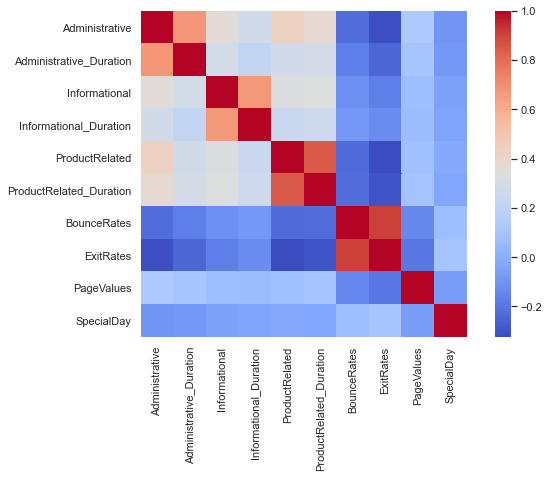

In [203]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Между `ProductRelated` и `ProductRelated_Duration` существует линейная зависимость. Страницы с высоким показателем отказов, как правило, имеют высокий процент выхода со страницы.

## Обработка категориальных признаков

In [204]:
cat_vars = list(data.select_dtypes('category').columns)

Признак `Revenue` можно исключить.

In [205]:
cat_vars = cat_vars[:-1]

In [206]:
data_dummies = pd.get_dummies(data, columns=cat_vars)

In [207]:
data_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
4,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [208]:
data_dummies.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType

# Решение задачи классификации

## Разбиение на обучающую и тестовую выборки

In [209]:
x = data_dummies
x = x.drop(['Revenue'], axis=1)
y = data['Revenue']
y = y.astype(int)

In [210]:
print("x:", x.shape)
print("y:", y.shape)

x: (12037, 75)
y: (12037,)


In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8425, 75), (3612, 75), (8425,), (3612,))

## Обработка численных признаков

Чтобы нормализовать численные признаки, воспользуемся линейным преобразованием, приводящим все значения к нулевому среднему и единичному стандартному отклонению.

In [212]:
sc = sklearn.preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [213]:
x_test = pd.DataFrame(x_test)
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
count,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,...,3.612000e+03,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000
mean,-0.006023,0.018429,-0.002974,-0.015008,0.005423,0.009121,0.021199,0.019253,-0.036813,0.047674,...,-1.887352e-02,0.000277,-0.024226,0.002178,-0.009845,-0.040913,0.020172,0.035753,-0.041535,0.041535
std,0.986874,1.037482,0.962588,0.911718,0.975240,0.993543,1.008592,1.001799,0.909629,1.078681,...,3.469927e-18,0.016639,0.509357,1.029776,0.961232,0.956425,1.119961,0.963454,1.026006,1.026006
min,-0.695076,-0.535369,-0.395433,-0.276080,-0.797495,-0.758370,-0.453326,-0.886864,-0.361829,-0.304628,...,-1.887352e-02,0.000000,-0.032702,-0.036157,-0.127130,-0.407145,-0.078806,-2.395830,-1.845014,-0.542001
25%,-0.695076,-0.535369,-0.395433,-0.276080,-0.609612,-0.628616,-0.453326,-0.590837,-0.361829,-0.304628,...,-1.887352e-02,0.000000,-0.032702,-0.036157,-0.127130,-0.407145,-0.078806,0.417392,0.542001,-0.542001
50%,-0.387010,-0.487111,-0.395433,-0.276080,-0.314367,-0.343155,-0.377528,-0.338785,-0.361829,-0.304628,...,-1.887352e-02,0.000000,-0.032702,-0.036157,-0.127130,-0.407145,-0.078806,0.417392,0.542001,-0.542001
75%,0.229120,0.165599,-0.395433,-0.276080,0.195603,0.235806,-0.074336,0.149231,-0.361829,-0.304628,...,-1.887352e-02,0.000000,-0.032702,-0.036157,-0.127130,-0.407145,-0.078806,0.417392,0.542001,-0.542001
max,6.698490,8.278913,8.133802,9.546982,8.569834,6.417165,3.715557,3.257516,7.186706,4.805868,...,-1.887352e-02,1.000000,30.579587,27.656990,7.865948,2.456126,12.689335,0.417392,0.542001,1.845014


## Классификатор kNN

Посмотрим на ошибку в зависимости от количества соседей:

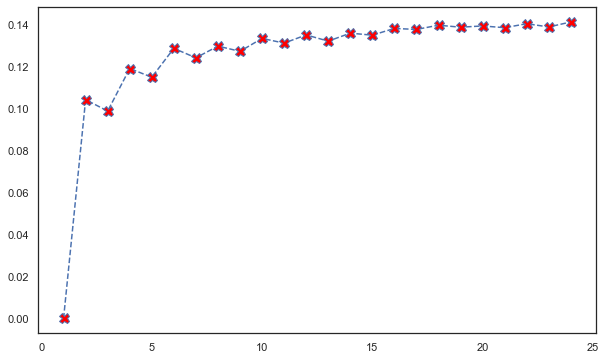

In [214]:
error_rate = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_train)
    error_rate.append(np.mean(y_pred != y_train))
plt.plot(range(1, 25), error_rate, marker='X', linestyle='dashed', markerfacecolor='red', markersize=10)
pass

Из графика видно, что 3 соседа имеют наименьший процент ошибки.

In [215]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 1.0
Test accuracy : 0.8239202657807309


In [216]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.9011275964391692
Test accuracy : 0.8574197120708749


In [217]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.8687240356083086
Test accuracy : 0.8715393133997785


In [218]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.8611275964391691
Test accuracy : 0.8690476190476191


## Random Forest

In [219]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=101)
rfc.fit(x_train, y_train)
print("Train accuracy :", rfc.score(x_train, y_train))
print("Test accuracy :", rfc.score(x_test, y_test))

Train accuracy : 0.93459940652819
Test accuracy : 0.9061461794019934


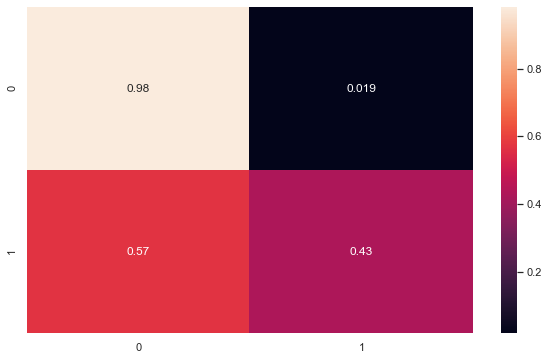

In [220]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(x_test), normalize='true'), annot = True)

## Выводы по 1 части

##### Классификатор kNN обладает следующей точностью:

1 сосед:
  - Train accuracy = 100%
  - Test accuracy = 82.39%
  
3 соседа:
  - Train accuracy = 90.11%
  - Test accuracy = 85.74%
  
11 соседей:
  - Train accuracy = 86.87%
  - Test accuracy = 87.15%
  
19 соседей:
  - Train accuracy = 86.11%
  - Test accuracy = 86.90%

100% точность на обучающей выборке для одного соседа обьясняется тем, что при вычислении одного ближайшего соседа на той же самой выборке, на которой проходило обучение, классификатор выберет этот же самый элемент.

##### Классификатор Random Forest обладает следующей точностью:
  - Train accuracy = 93.45%
  - Test accuracy = 90.61%
  
Заметим, что случайный лес имеет самую высокую точность, будучи ансамблевой моделью.

## PCA

In [221]:
from sklearn.decomposition import PCA

X = data_dummies
X = X.drop(['Revenue'], axis=1)
y = data['Revenue']
y = y.astype(int)

sc = sklearn.preprocessing.StandardScaler()
Xs = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs)
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])

In [222]:
X.shape, X_pca.shape

((12037, 75), (12037, 2))

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8425, 2), (3612, 2), (8425,), (3612,))

In [224]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.346433,0.288873,0.284150,0.245331,0.360548,0.356513,-0.299018,-0.347018,0.127976,-0.097088,...,0.003375,-0.009141,-0.006148,-0.011709,-0.043863,0.061463,-0.05860,-0.046726,-0.046552,0.046552
1,0.044389,0.051058,0.007454,0.004093,-0.055924,-0.051222,-0.089344,-0.104635,0.077747,-0.122808,...,-0.003565,0.002111,-0.013747,-0.013579,0.258701,0.221683,0.33219,-0.294123,-0.071631,0.071631


In [225]:
print("Дисперсии по главным компонентам:")
print(pca.explained_variance_)

Дисперсии по главным компонентам:
[3.7191446  3.13105186]


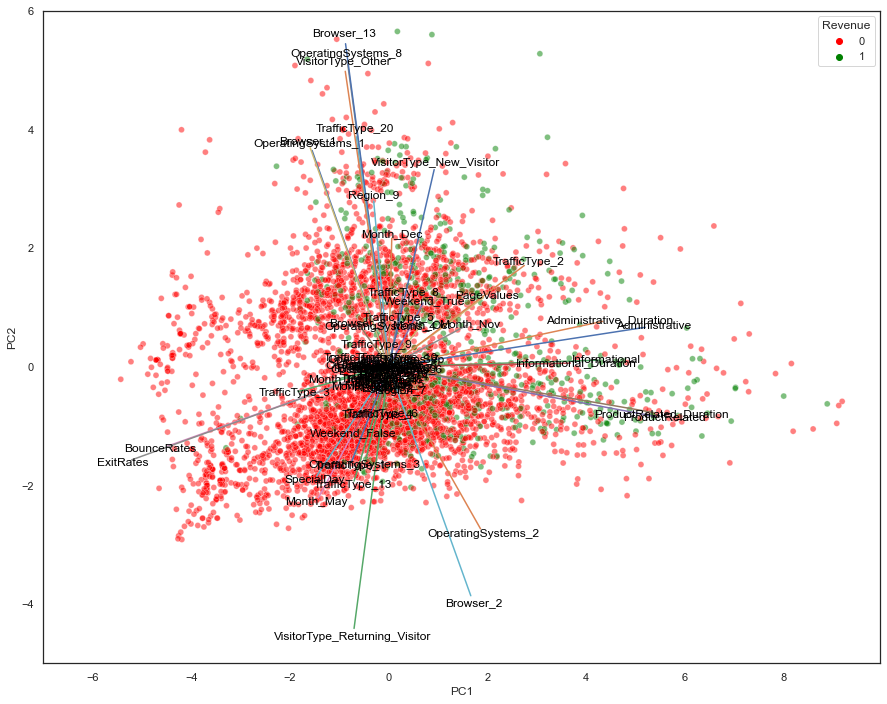

In [226]:
def Biplot(X, y, coeff, labels):
    plt.figure(figsize=(15,12))
    draw = pd.concat([X_pca, y], axis=1, join='inner')
    np.random.seed(42)
    random_subset = np.random.choice(np.arange(draw.shape[0]), size=5000, replace=False)
    sns.scatterplot(data=draw.iloc[random_subset], x='PC1', y='PC2', hue='Revenue', palette=['red', 'green'], alpha=0.5)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i] * 15.5, coeff[1, i] * 15.5, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i] * 15], [0, coeff[1, i] * 15])
    plt.ylim((-5, 6))
    
Biplot(X_pca, y, pca.components_, X.columns)

Биплот представляет переменные с откалиброванными осями и наблюдениями в виде точек, позволяющих проецировать наблюдения на оси для аппроксимации исходных значений переменных. Наиболее важными оказываются признаки:

- `VisitorType_Returning_Visitor`
- `ExitRates`
- `BounceRates`
- `Browser_13`, `OperatingSystems_8`
- `ProductRelated`, `Informational`, `Administrative`

Используем лучший классификатор, из исследований без PCA

In [227]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=101)
rfc.fit(X_train, y_train)
print("Train accuracy :", rfc.score(X_train, y_train))
print("Test accuracy :", rfc.score(X_test, y_test))

Train accuracy : 0.8592284866468842
Test accuracy : 0.8596345514950167


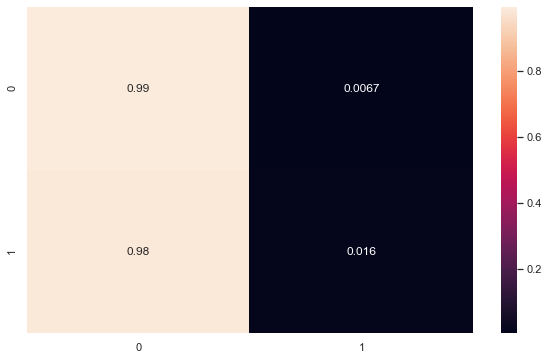

In [228]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test), normalize='true'), annot = True)
pass

## LDA

In [229]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
X_LDA = LDA.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_LDA, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8425, 1), (3612, 1), (8425,), (3612,))

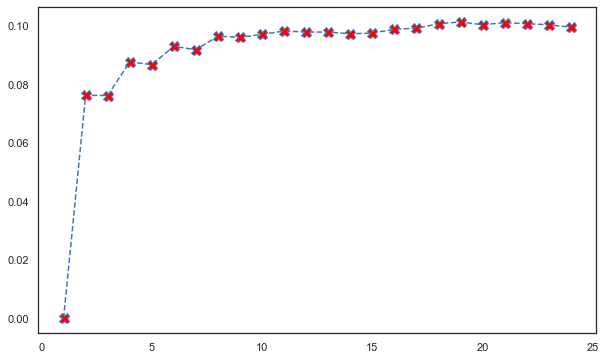

In [230]:
error_rate = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error_rate.append(np.mean(y_pred != y_train))
plt.plot(range(1, 25), error_rate, marker='X', linestyle='dashed', markerfacecolor='red', markersize=10)
pass

Для одномерного результата работы LDA наилучшим оказывается kNN с k=2. Также общая точность стала выше, чем без сокращения размерности.

## Проведем исследования с различным количеством компонент

In [231]:
Xs = sc.fit_transform(X)
pca = PCA(n_components=60)
X_pca = pca.fit_transform(Xs)

print(pca.explained_variance_)

[3.71914697 3.13108734 2.94685024 2.45132112 2.16577148 2.04567567
 1.94595145 1.81764344 1.5364857  1.44494091 1.43215311 1.36549035
 1.28341698 1.27333079 1.19527977 1.17407818 1.1691873  1.15046253
 1.12874012 1.12647585 1.11431292 1.10766379 1.09224116 1.08381568
 1.07590382 1.06433936 1.05353667 1.0500961  1.04143471 1.03290041
 1.0289779  1.02448638 1.01721268 1.01110575 1.00610077 1.0020437
 0.99702708 0.99567695 0.98688374 0.9849132  0.98085517 0.97725302
 0.97150619 0.96659358 0.9622473  0.95820078 0.95310277 0.94886165
 0.92871719 0.91382691 0.91065987 0.88573505 0.85089356 0.83626623
 0.79500831 0.74670938 0.73938022 0.68965156 0.64945333 0.49034604]


Рассмотрим компоненты у которых обьясненная дисперсия выше чем $\alpha$ = 0.5 

0.14765578635014837 58
0.0902547065337763 11


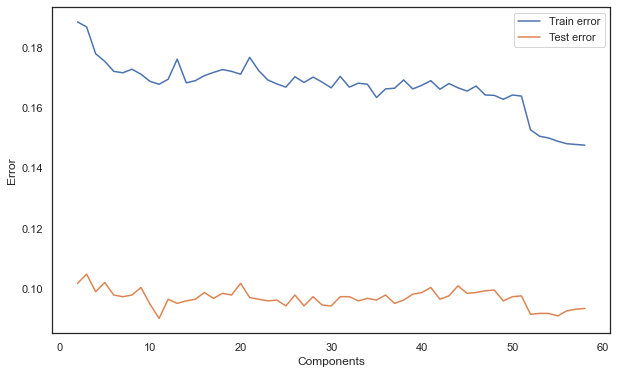

In [232]:
error_train_rate, error_test_rate = [], []
for N_comp in range(2, 59):
    pca = PCA(n_components=N_comp)
    X_pca = pca.fit_transform(Xs)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    knn.fit(X_test, y_test)
    error_train_rate.append(np.mean(y_train != knn.predict(X_train)))
    error_test_rate.append(np.mean(y_test != knn.predict(X_test)))
    
plt.plot(range(2, 59), error_train_rate, label="Train error")
plt.plot(range(2, 59), error_test_rate, label="Test error")
plt.xlabel("Components")
plt.ylabel("Error")
plt.legend()
print(min(error_train_rate), 2+error_train_rate.index(min(error_train_rate)))
print(min(error_test_rate), 2+error_test_rate.index(min(error_test_rate)))

0.1258160237388724 52
0.05758582502768549 41


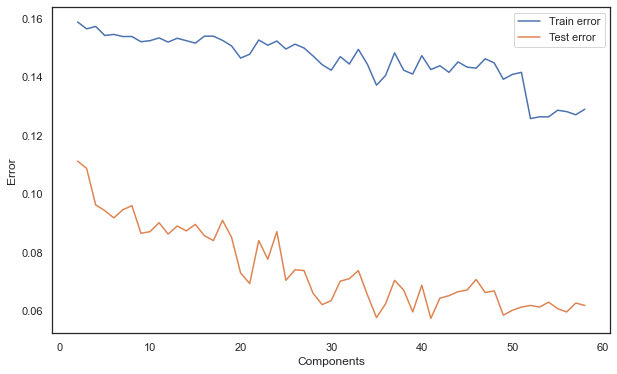

In [233]:
error_train_rate, error_test_rate = [], []
for N_comp in range(2, 59):
    pca = PCA(n_components=N_comp)
    X_pca = pca.fit_transform(Xs)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    rfc = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=101)
    rfc.fit(X_train, y_train)
    rfc.fit(X_test, y_test)
    error_train_rate.append(np.mean(y_train != rfc.predict(X_train)))
    error_test_rate.append(np.mean(y_test != rfc.predict(X_test)))
    
plt.plot(range(2, 59), error_train_rate, label="Train error")
plt.plot(range(2, 59), error_test_rate, label="Test error")
plt.xlabel("Components")
plt.ylabel("Error")
plt.legend()
print(min(error_train_rate), 2+error_train_rate.index(min(error_train_rate)))
print(min(error_test_rate), 2+error_test_rate.index(min(error_test_rate)))

## Выводы


- Таким образом, PCA не подходит для данного набора данных, при уменьшении размерности, на классификаторе RandomForest мы получаем точность на `train = 86%`, на `test = 85.90%`, что значительно ниже, если не применять PCA.
- При использовании классификаторов `kNN` и `RandomForest` в зависимости от количества компонент, мы получили на тестовых наборах, увеличение точности на `4.26%` и `3.69%` соответственно, на `11` и `41` компонентах. На тренировочном наборе, в обоих случаях точность понизилась. Также можно проследить, что при увеличении числа компонент, ошибка уменьшается.